In [1]:

  

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.4.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

"""
Let's explore the format of the dataset before training the model.
The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:
"""

print(train_images.shape)


(60000, 28, 28)


In [3]:

"""Likewise, there are 60,000 labels in the training set:"""

print(len(train_labels))


60000


In [4]:
"""Each label is an integer between 0 and 9:"""

print(train_labels)


[9 0 0 ... 3 0 5]


In [5]:
"""There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:"""

print(test_images.shape)


(10000, 28, 28)


In [6]:

"""And the test set contains 10,000 images labels:"""

print(len(test_labels))


10000


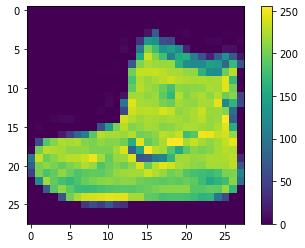

In [7]:
"""## Preprocess the data
The data must be preprocessed before training the network.
If you inspect the first image in the training set, you will see that the pixel values
fall in the range of 0 to 255:
"""

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

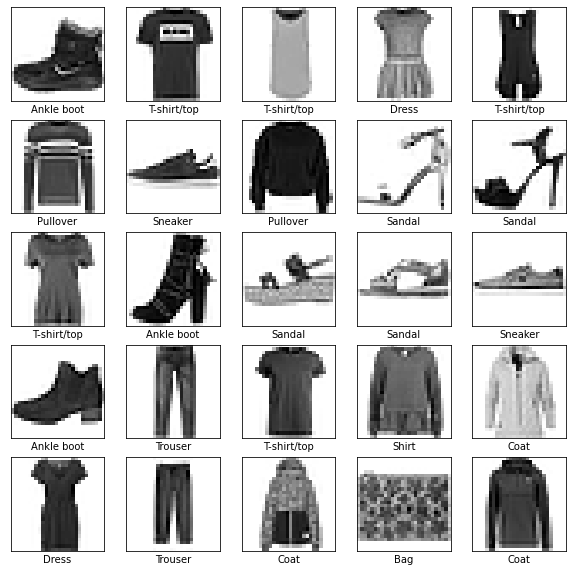

In [8]:
"""Scale these values to a range of 0 to 1 before feeding them to the neural network model.
To do so, divide the values by 255.
It's important that the *training set* and the *testing set* be preprocessed in the same way:"""

train_images = train_images / 255.0

test_images = test_images / 255.0

"""To verify that the data is in the correct format and that you're ready to build and
train the network, let's display the first 25 images from the *training set*
and display the class name below each image."""

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [10]:
"""## Build the model
Building the neural network requires configuring the layers of the model,
then compiling the model.
### Set up the layers
The basic building block of a neural network is the *layer*.
Layers extract representations from the data fed into them.
Hopefully, these representations are meaningful for the problem at hand.
Most of deep learning consists of chaining together simple layers.
Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.
"""

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

"""The first layer in this network, `tf.keras.layers.Flatten`,
transforms the format of the images from a two-dimensional array (of 28 by 28 pixels)
to a one-dimensional array (of 28 * 28 = 784 pixels).
### Compile the model
Before the model is ready for training, it needs a few more settings.
These are added during the model's *compile* step:
* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.
"""

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

"""## Train the model
Training the neural network model requires the following steps:
1. Feed the training data to the model. In this example, the training data is in the `
train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example,
the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.
### Feed the model
To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:
"""

model.fit(train_images, train_labels, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6242 - accuracy: 0.7804
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3918 - accuracy: 0.8584
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3426 - accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3124 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2981 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2817 - accuracy: 0.8981TA: 0s - loss:
Epoch 7/10
1875/1875 [==============================] - 2s 969us/step - loss: 0.2695 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.2554 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2461 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/

In [13]:
### Evaluate accuracy
#Next, compare how the model performs on the test dataset:
"""

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


"""
### Make predictions


probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

"""Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:"""

print(predictions[0])

#A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.
#ou can see which label has the highest confidence value:

np.argmax(predictions[0])

"""So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:"""

print(test_labels[0])

[3.1917391e-08 7.0177649e-14 1.2269324e-08 1.0517250e-12 3.6970835e-08
 1.1893018e-03 2.3550889e-08 5.5475314e-03 1.4979223e-08 9.9326307e-01]
9


In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


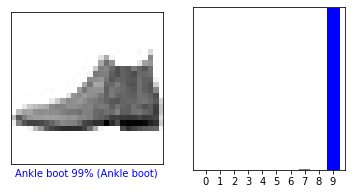

In [15]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

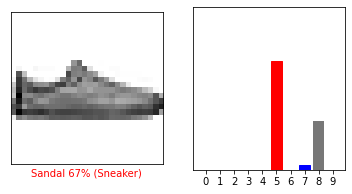

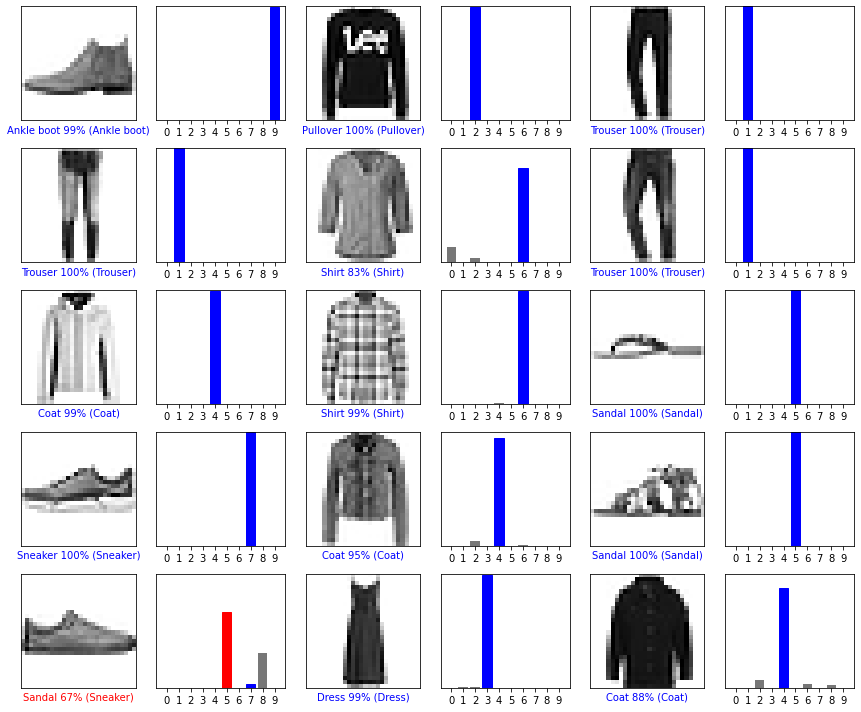

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

"""Let's plot several images with their predictions.
Note that the model can be wrong even when very confident."""

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
